## Step 1 - Load dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('customer_segmentation.csv')

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


## Step 2 - Clean & Select Features

In [4]:
# Checking null values
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

We can see that there are only null values in "Income" column. To proceed, we are going to drop all records where Income is null.

In [5]:
df.shape

(2240, 29)

There are total of 2240 records and 29 columns.

In [6]:
# Removing null values
df.dropna(inplace = True)

In [7]:
df.shape

(2216, 29)

Now the total number of records in dataset is 2216 which means 24 records have been removed where Income was null.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

There are altogether 26 columns which are numerical type.

In [9]:
# Selecting all numerical columns
num_cols = df.select_dtypes(include=['number'])

In [10]:
num_cols.head()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,58138.0,0,0,58,635,88,546,172,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,46344.0,1,1,38,11,1,6,2,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,71613.0,0,0,26,426,49,127,111,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,26646.0,1,0,26,11,4,20,10,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,58293.0,1,0,94,173,43,118,46,...,5,0,0,0,0,0,0,3,11,0


## Step 3 - Normalize features

In [11]:
# Normalize numerical columns to standard value
from sklearn.preprocessing import StandardScaler
scaled = StandardScaler().fit_transform(num_cols)

In [12]:
# Scaled dataset
scaled_df = pd.DataFrame(scaled, columns=num_cols.columns)

Let's see what happened exactly after normalizing features, so we will check for 'Income' feature in the dataset.

In [13]:
df['Income']

0       58138.0
1       46344.0
2       71613.0
3       26646.0
4       58293.0
         ...   
2235    61223.0
2236    64014.0
2237    56981.0
2238    69245.0
2239    52869.0
Name: Income, Length: 2216, dtype: float64

In [14]:
scaled_df['Income']

0       0.234063
1      -0.234559
2       0.769478
3      -1.017239
4       0.240221
          ...   
2211    0.356642
2212    0.467539
2213    0.188091
2214    0.675388
2215    0.024705
Name: Income, Length: 2216, dtype: float64

- You can see above that the values of "Income" feature has been scaled between -1 to 1 with respect to their actual values.   Similarly, each numerical feature has been scaled between -1 to 1. 

- By this debugging, visualization, and modeling will become easier.

## Step 4 - Find optimal value of K(Elbow method)

Now we are going to apply, K means clustering on the dataset so first we need to find optimal value of 'K'

In [16]:
# Converting to numpy datatype
X = scaled_df.to_numpy(dtype=float)

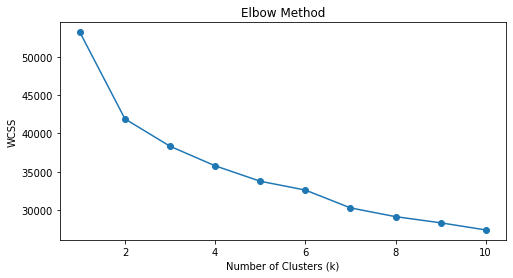

In [17]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []

for k in range(1, 11):
    kmeans = KMeans(
        n_clusters=k,
        random_state=42,
        n_init=10
    )
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

The elbow is clearly around **k = 3** so we will consider k = 3 is the optimal value.

## Step 5 - Apply K-Means

In [22]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X)

df['Cluster'] = clusters

## Step 6 - Visualize clusters

In [23]:
# Reducing dimensions using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

In [24]:
# Creating PCA DataFrame for plotting
pca_df = pd.DataFrame(
    X_pca,
    columns=['PC1', 'PC2']
)

pca_df['Cluster'] = clusters

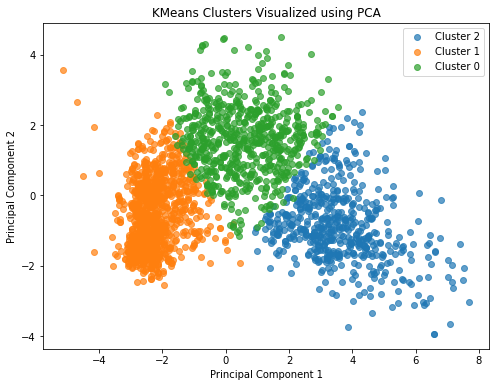

In [25]:
# Finally visualizing clusters
plt.figure(figsize=(8, 6))

for cluster in pca_df['Cluster'].unique():
    plt.scatter(
        pca_df[pca_df['Cluster'] == cluster]['PC1'],
        pca_df[pca_df['Cluster'] == cluster]['PC2'],
        label=f'Cluster {cluster}',
        alpha=0.7
    )

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clusters Visualized using PCA')
plt.legend()
plt.show()

## Step 7 - Insight report

- **Cluster 2 (Blue) – High-Value / Heavy Engagement Customers**
  - **Position**: Right side (high PC1 values)
  
  -  **Characteristics** :-
     - Likely higher income (VIP segment)

     - Higher spending across product categories

     - More frequent purchases (web, catalog, store)

     - Strong campaign response probability
     
  - **Business Insight** :- 

     - This cluster represents high-value customers

     - Critical for revenue retention

  - **Recommended Actions** :-

     - Personalized offers and loyalty programs

     - Early access to new products

     - Premium upsell and cross-sell strategies

- **Cluster 1 (Orange) – Low-Engagement / Price-Sensitive Customers**
  - **Position**: Left side (low PC1 values)
  
  -  **Characteristics** :-
     - Lower overall spending
     - Fewer purchases
     - Higher sensitivity to discounts
     - Possibly larger families or budget constraints
     
  - **Business Insight** :- 

     - Revenue contribution is relatively low
     - Cost of retention may outweigh short-term returns

  - **Recommended Actions** :-

     - Targeted discounts and bundles
     - Re-engagement campaigns
     - Automated, low-cost marketing strategies

- **Cluster 0 (Green) – Mid-Value / Growth-Potential Customers**
  - **Position**: Center-top region
  
  -  **Characteristics** :-
     - Moderate income and spending
     - Selective but consistent buyers
     - Responsive to targeted promotions
     
  - **Business Insight** :- 

     - Strong growth potential
     - Best candidates for conversion to high-value customers

  - **Recommended Actions** :-

     - Personalized recommendations
     - Timely promotions based on behavior
     - Product education and nudges